<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight') #sets the styles for matplotlin plots

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
print(movies.duration.mean())
print(movies.loc[:,'duration'].mean())

120.97957099080695
120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies.sort_values(by='duration',inplace=True,ascending=True)
print("********shortest movie is ",movies.head(1))
movies.sort_values(by='duration',inplace=True,ascending=False)
print("********longest movie is ",movies.head(1))


********shortest movie is       star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
********longest movie is       star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

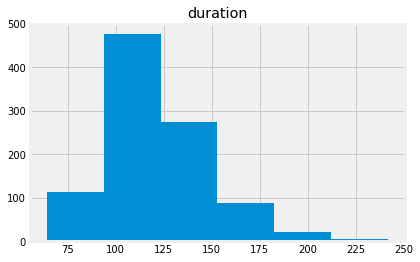

In [8]:
# Answer:
ax = movies.hist(column='duration',bins=6)


#### Use a box plot to display that same data.

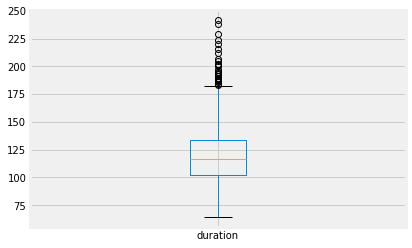

In [9]:
# Answer:
ax = movies.boxplot(column='duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

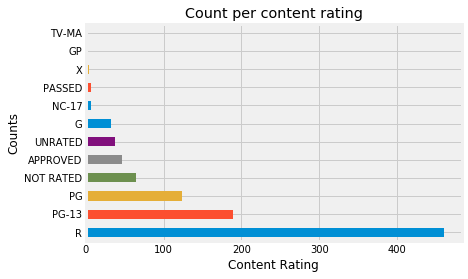

In [76]:
# Answer:
ax = movies.loc[:,'content_rating'].value_counts().plot(kind='barh')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Counts')
ax.set_title('Count per content rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [35]:
# Answer:"UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.loc[:,'content_rating'].map(
    {'NOT RATED':'UNRATED','APPROVED':'UNRATED','PASSED':'UNRATED','GP':'UNRATED','R':'R',
    'PG-13':'PG-13','PG':'PG','G':'G','NC-17':'NC-17','X':'X','TV-MA':'TV-MA'}
).value_counts()

R          460
PG-13      189
PG         123
UNRATED    122
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [36]:
# Answer:
movies.loc[:,'content_rating'].map(
    {'NOT RATED':'UNRATED','APPROVED':'UNRATED','PASSED':'UNRATED','GP':'UNRATED','R':'R',
    'PG-13':'PG-13','PG':'PG','G':'G','NC-17':'NC-17','X':'NC-17','TV-MA':'NC-17'}
).value_counts()

R          460
PG-13      189
PG         123
UNRATED    122
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [37]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [38]:
# Answer:
print(movies.loc[:,'content_rating'].value_counts(dropna=False))
movies.isnull().sum()
movies.loc[:,'content_rating'].fillna(value='NA').value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
NaN            3
TV-MA          1
Name: content_rating, dtype: int64


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
NA             3
TV-MA          1
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [39]:
# Answer:
avg_more = movies.loc[movies.loc[:,'duration']>=120,'star_rating'].mean()
avg_less =movies.loc[movies.loc[:,'duration']<120,'star_rating'].mean()

print(avg_more)
print(avg_less)

if avg_more>avg_less:
    print('Average Star Rating of movies 2 hours or longer is more than average star rating of movies shorter than 2 hours')
elif avg_more<avg_less:
    print('Average Star Rating of movies 2 hours or longer is less than average star rating of movies shorter than 2 hours')
else:
    print('Average Star Rating of movies 2 hours or longer is same as average star rating of movies shorter than 2 hours')

7.948898678414094
7.838666666666657
Average Star Rating of movies 2 hours or longer is more than average star rating of movies shorter than 2 hours


#### Use a visualization to detect whether there is a relationship between duration and star rating.

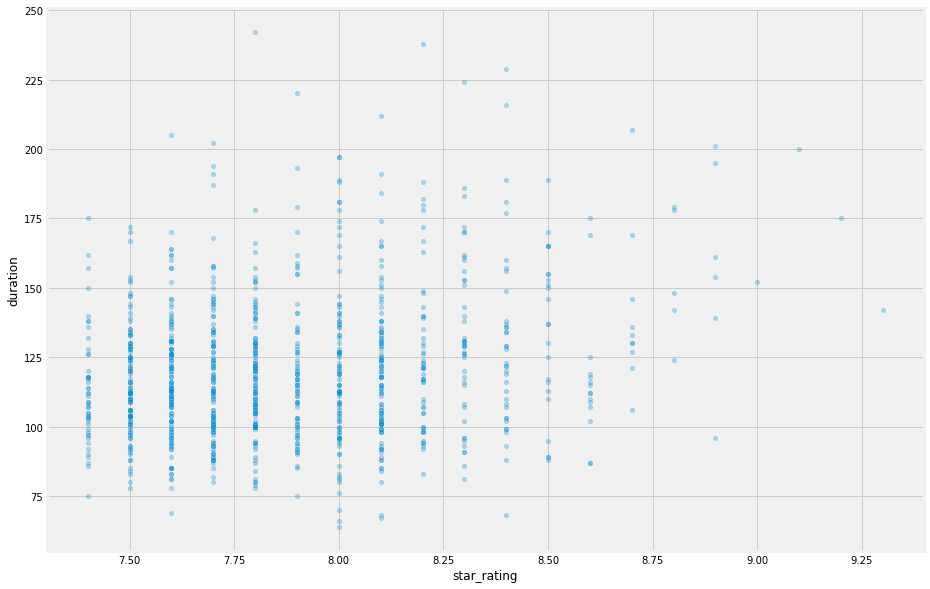

In [58]:
# Answer:

ax = movies.plot(kind='scatter', x='star_rating',y='duration',figsize=(14,10),alpha=0.3)


Observation
-  movies with high star_rating are not the longest duration
- movies with longer duration have lower star_rating

#### Calculate the average duration for each genre.

In [49]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

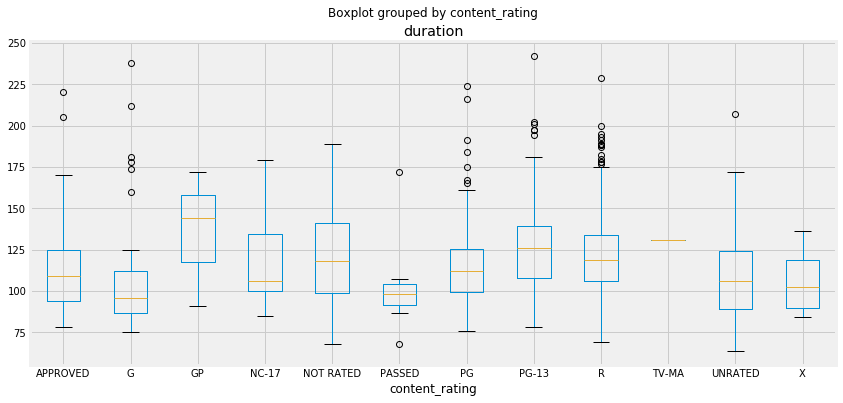

In [64]:
# Answer:
ax1 = movies.boxplot(column='duration', by='content_rating', figsize=(14,6))

#### Determine the top rated movie (by star rating) for each genre.

In [73]:
# Answer:
#we will find out the top rated per genre using the 'max' aggregate function on the star_rating column
# this itself is a data frame with genre as the index
rating_df = movies.groupby('genre')['star_rating'].agg(['max'])
print(rating_df)
#we can possibly do a join on the genre column with movies data frame and above data frame 
#to list the movies that are top rated in that genre
new_df = movies.join(rating_df, on='genre', how='right')
#we will create a new column called high_rated to match all the movies which have star_rating same as max star_rating
new_df.loc[:,'high_rated'] = new_df.apply(lambda row:row.loc['star_rating']==row.loc['max'], axis='columns')
#we get the movies list by filtering the high_rated boolean columns
new_df.loc[new_df.loc[:,'high_rated']==True,:]

           max
genre         
Action     9.0
Adventure  8.9
Animation  8.6
Biography  8.9
Comedy     8.6
Crime      9.3
Drama      8.9
Family     7.9
Fantasy    7.7
Film-Noir  8.3
History    8.0
Horror     8.6
Mystery    8.6
Sci-Fi     8.2
Thriller   8.0
Western    8.9


,star_rating,title,content_rating,genre,duration,actors_list,max,high_rated
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh...",8.9,True
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",8.9,True
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",9.3,True
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",8.9,True
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",9.0,True
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",8.9,True
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G...",8.6,True
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F...",8.6,True
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He...",8.6,True
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",8.9,True


In [82]:
# to check the results
movies.loc[movies.loc[:,'genre']=='History',:].sort_values('star_rating', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [66]:
# Answer:
#this gives the unique list of all the duplicated titles
duple_title = movies[movies.title.duplicated()]
#we create the title as index for this lookup data frame
duple_title.set_index ('title', inplace=True)
#we will join this lookup data frame with the movies data frame to create a new data frame which will list
#the list of movies including the duplicates
duplicate_movie_title = movies.join(duple_title, on='title', how='right', lsuffix="_movies",rsuffix='_dupl')
duplicate_movie_title


,star_rating_movies,title,content_rating_movies,genre_movies,duration_movies,actors_list_movies,star_rating_dupl,content_rating_dupl,genre_dupl,duration_dupl,actors_list_dupl
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",7.5,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",7.5,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",7.8,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",7.8,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",7.7,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",7.7,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",7.6,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",7.6,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [67]:
# Answer:
print(movies.loc[:,'genre'].value_counts())

filter_genre = movies.loc[:,'genre'].isin(['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery'])

movies.loc[filter_genre,:].groupby('genre')['star_rating'].mean()



Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [68]:
# Answer:
sf = movies.loc[:,'genre'].value_counts()
movie_counts = pd.DataFrame({'genre_':sf.index, 'counts_':sf.values})
movie_counts.set_index('genre_',inplace=True)
movie_counts

movies_merged = movies.join(movie_counts,on='genre', how='right')
movies_merged.loc[movies_merged.loc[:,'counts_'] > 10,:].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [69]:
# Answer:
new_df=movies.loc[:,['genre','star_rating']].groupby('genre').describe()
new_df_count = new_df.loc[:,['star_rating'][0]].loc[:,'count'] > 10
new_df.loc[new_df_count,['star_rating'][0]].loc[:,'mean']

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: mean, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [70]:
# Answer:
filter_genre4 = movies.groupby('genre')['star_rating'].agg(['count','mean'])
filter_genre4.loc[filter_genre4.loc[:,'count'] > 10,'mean']

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: mean, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

In [72]:
print(movies.loc[:,'actors_list'].describe())#unique set is less than total. The actors worked together in more than one movie
print(movies.loc[:,'actors_list'].value_counts()) #the combinationof actors worked in sequels of the same movie or in different movies

count                                                   979
unique                                                  969
top       [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
freq                                                      6
Name: actors_list, dtype: object
[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']                6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                  3
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']             2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                          2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']            2
[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russell']                    1
[u'Leslie Nielsen', u'Priscilla Presley', u'O.J. Simpson']            1
[u'Johnny Depp', u'Pen\xe9lope Cruz', u'Franka Potente']              1
[u'Owen Wilson', u'Rachel McAdams', u'Kathy Bates']                   1
[u'Al Pacino', u'Jack Lemmon', u'Alec Baldwin']                       1
[u'Mari

Observation:
- unique set is less than total. The actors worked together in more than one movie
- the same combination of actors worked in sequels of the same movie or in different movies